In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data",header=None,sep=',')


In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


1) Alcohol
 	2) Malic acid
 	3) Ash
	4) Alcalinity of ash  
 	5) Magnesium
	6) Total phenols
 	7) Flavanoids
 	8) Nonflavanoid phenols
 	9) Proanthocyanins
	10)Color intensity
 	11)Hue
 	12)OD280/OD315 of diluted wines
 	13)Proline            


In [6]:
df.columns = ['Class','Alcohol','Malic_acid','Ash','Alcalinity','Magnesium','Total_phenols','Flavanoids',
             'Noflavnoids','Proantho','Color_inte','Hue','OD280','Proline']

In [7]:
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Noflavnoids,Proantho,Color_inte,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Normal Distribution

- Mean = Median = Mode
- if a random variable takes any value, we can estimate the probability of any other value with certain degree of 
- freedom and with certain confidence level

# Use Case

- if average marks scored in GMAT exam is 750, with a little deviation of 4, what is the probability that at least people who have scored 687 would be selected.

In [8]:
# mean +/- 1 SD = 68.27% 
# mean +/- 2 SD = 95.45%
# mean +/- 3 SD = 99.7%

In [23]:
mean = 750
sd = 43

In [24]:
z = (mean-687)/43.

In [25]:
z

1.4651162790697674

In [26]:
stats.norm.cdf(687,750,43)

0.071444597978703062

#- if average marks scored in GMAT exam is 750, with a little deviation of 43, what score should a person get so that the prob of slection would be be 80%? 

In [29]:
stats.norm.ppf(q=0.80) # standard normal distibution 

0.8416212335729143

In [31]:
stats.norm.ppf(q=0.80,loc=750,scale=43)

786.18971304363527

# Task

-check if the distibution for Proline follows a normal distribution, what is the probability that a sample from wine bottle would have proline content of 1120 units?

In [32]:
stats.norm.cdf(1120,df.Proline.mean(),df.Proline.std())

0.8819544752196522

In [33]:
# if the distribution is not normal you cannot apply the next test question

In [34]:
import seaborn as sns

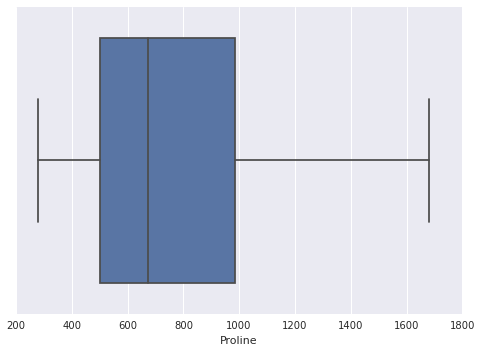

In [36]:
sns.boxplot(x=df.Proline,data=df)

In [37]:
# if the dist is skewed towards right then use log transformation
# if the distribution is skewed towards left use square transformation

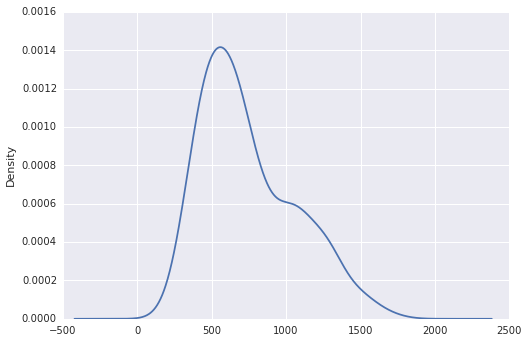

In [38]:
df.Proline.plot(kind='density')

# Binomial Distribution


- Any random variable which assumes two possible outcomes such as either the output is true/false, accept /reject, pass/fail, head/tail, is known as a binomial distribution

In [39]:
import random

In [53]:
random.seed(1245)

In [54]:
coin = stats.binom.rvs(n=10,p=0.5,size=100)

In [55]:
coin

array([5, 7, 4, 6, 7, 6, 3, 7, 6, 3, 7, 3, 5, 5, 4, 5, 5, 8, 7, 5, 7, 4, 5,
       4, 7, 5, 5, 5, 6, 4, 8, 3, 7, 5, 8, 5, 5, 7, 5, 6, 4, 5, 4, 5, 3, 5,
       3, 6, 6, 5, 5, 7, 4, 6, 6, 4, 8, 5, 3, 4, 5, 6, 5, 6, 3, 3, 4, 6, 6,
       3, 5, 9, 5, 4, 3, 3, 5, 3, 7, 5, 1, 7, 3, 7, 2, 3, 4, 4, 4, 3, 5, 6,
       5, 6, 7, 4, 4, 7, 8, 6])

In [56]:
pd.crosstab(index='counts',columns=coin)

col_0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,
counts,1,1,16,17,28,16,15,5,1


# Use Case

- Problem: there are 12 MCQs in an interview, each question has 5 possible answers, one is correct.
- find the probability that getting 4 or more correct answers if the candidate answers all the questions at random

In [58]:
stats.binom.cdf(4,12,0.2)

0.92744450048000004

In [59]:
1- stats.binom.cdf(4,12,0.2)

0.072555499519999955

In [62]:
t1=stats.binom.pmf(0,12,0.2)

In [63]:
t2=stats.binom.pmf(1,12,0.2)

In [64]:
t3=stats.binom.pmf(2,12,0.2)

In [65]:
t4=stats.binom.pmf(3,12,0.2)

In [66]:
t5=stats.binom.pmf(4,12,0.2)

In [67]:
print 1-(t1+t2+t3+t4+t5)

0.07255549952


# Poisson Probability Distribution

- count data, it has limited application where ever you want to compute the probability of any specific count

# Example:
- On an average 20 people visit your linked in profile in a day, what is the probability that 32 people would be visitng your linked in profile in any given day.
- Traffic management- probability of number of vehicles passing a particular crossing
- Web traffic control
- call routing 
- Internation call management
- web site visit prediction

In [68]:
stats.poisson.cdf(k=32,mu=20)

0.99527257446146933

# Hypothesis testing process

- 1- seeting up Null and Alternative Hypothesis
    - Null: average income of all employees is 67K$
    - Alt1: average income of all employees is not equal to 67k$
    - Alt2: average income of all employees is greater than 67K$
    - Alt3: average income of all employees is less than 67K$
- 2- Select the Significance level
    - 5% significance level, generic and applicable in all scenarios
    - 10% significance level, where less accuracy may be ok but it is applicable for small sample
    - 1% singificance level, where great degree of accuracy required
- 3 - Seelct the Test statistics
    - t-test
    - z-test
    - ANOVA
    - Paired sample t-test
    - independent sample t-test
    - chi-squared independent test
- 4- decision boundary
- 5- make conclusions
    - conclusion based on the p-value derived from the test statistics

In [69]:
# single sample test of mean
# two sample test of mean (paired sample, indepednent)

In [77]:
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Noflavnoids,Proantho,Color_inte,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [79]:
df.Alcohol.mean()

13.000617977528083

In [85]:
# Hypothesized mean = 15.2
stats.ttest_1samp(df.Alcohol,15.2) # check the distribution before applying t-test

Ttest_1sampResult(statistic=-36.14493333092696, pvalue=1.2371500101455496e-83)

In [82]:
df.Class.value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

# Assignment

1. Is there any difference between the average Alcohol content of Type 1 wine and Type 2 wine?
2. Is there any difference between the average Alcohol and Magnesium content in the wines

In [83]:
# two independnet sample t-test
#stats.ttest_ind(a=class1,b=class2)